In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/01_Jan.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,13.500000,77.000000,1,1,0,1549.0,1613.0,1699.0,1511.0,1495.0,1376.0,124.166667,1490.0
1,13.441667,78.083333,1,1,0,1521.0,1629.0,1662.0,1487.0,1454.0,1248.0,245.333333,1454.0
2,13.383333,79.166667,1,1,0,1526.0,1618.0,1644.0,1476.0,1429.0,1205.0,366.250000,1451.0
3,13.325000,80.250000,1,1,0,1519.0,1588.0,1621.0,1450.0,1271.0,1183.0,483.416667,1406.0
4,13.266667,81.333333,2,1,0,1490.0,1549.0,1613.0,1420.0,1282.0,1150.0,601.250000,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,11.412452,84.203770,23,4,1,1925.0,1956.0,2072.0,1832.0,1849.0,1620.0,1936.500000,1787.0
8636,11.412452,84.203770,24,4,1,1904.0,1948.0,2046.0,1793.0,1817.0,1587.0,1913.833333,1774.0
8637,11.412452,84.203770,24,4,1,1877.0,1947.0,2016.0,1730.0,1771.0,1562.0,1891.416667,1747.0
8638,11.312452,84.203770,24,4,1,1871.0,1977.0,1984.0,1702.0,1716.0,1517.0,1867.833333,1701.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4800][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.831098,-0.049353,0.367890,-1.660674,-1.479804,-1.332948,-0.597107,-0.343274,-0.002302,-0.739603,-0.796414,-1.254077,-6.449795
1,-0.973338,-0.065047,0.433143,-1.660674,-1.479804,-1.332948,-0.707701,-0.280084,-0.148421,-0.835649,-0.959195,-1.759263,-5.953322
2,-0.985191,-0.080741,0.498395,-1.660674,-1.479804,-1.332948,-0.687952,-0.323527,-0.219506,-0.879671,-1.058451,-1.928974,-5.457873
3,-1.162992,-0.096435,0.563647,-1.660674,-1.479804,-1.332948,-0.715601,-0.442007,-0.310337,-0.983721,-1.685753,-2.015803,-4.977789
4,-1.131383,-0.112128,0.628900,-1.516238,-1.479804,-1.332948,-0.830144,-0.596031,-0.341930,-1.103778,-1.642080,-2.146047,-4.494974


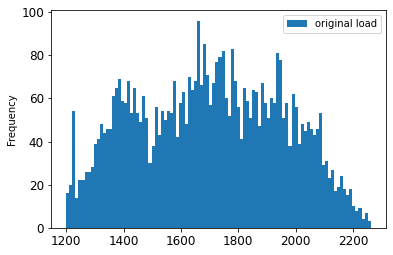

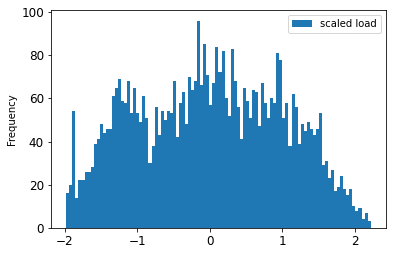

In [9]:
stlf_data[stlf_data.index <= 4800][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4800][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

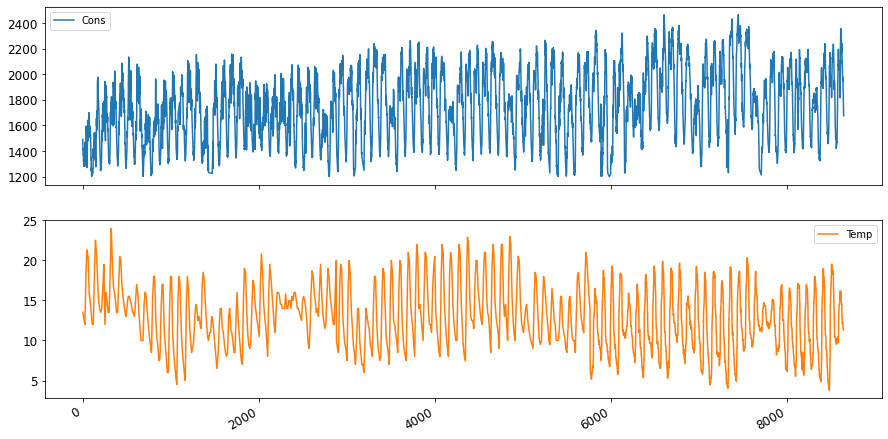

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-0.831098,-0.049353,0.367890,-1.660674,-1.479804,-1.332948,-0.597107,-0.343274,-0.002302,-0.739603,-0.796414,-1.254077,-6.449795,-0.973338
1,-0.973338,-0.065047,0.433143,-1.660674,-1.479804,-1.332948,-0.707701,-0.280084,-0.148421,-0.835649,-0.959195,-1.759263,-5.953322,-0.985191
2,-0.985191,-0.080741,0.498395,-1.660674,-1.479804,-1.332948,-0.687952,-0.323527,-0.219506,-0.879671,-1.058451,-1.928974,-5.457873,-1.162992
3,-1.162992,-0.096435,0.563647,-1.660674,-1.479804,-1.332948,-0.715601,-0.442007,-0.310337,-0.983721,-1.685753,-2.015803,-4.977789,-1.131383
4,-1.131383,-0.112128,0.628900,-1.516238,-1.479804,-1.332948,-0.830144,-0.596031,-0.341930,-1.103778,-1.642080,-2.146047,-4.494974,-1.293379
5,-1.293379,-0.127822,0.694152,-1.516238,-1.479804,-1.332948,-0.972336,-0.706612,-0.278744,-1.299872,-1.364162,-2.126313,-4.026158,-1.289428
6,-1.289428,-0.143516,0.759404,-1.516238,-1.479804,-1.332948,-0.984185,-0.686865,-0.322185,-1.415928,-1.399894,-2.023697,-3.557001,-1.360548
7,-1.360548,-0.159210,0.824657,-1.516238,-1.479804,-1.332948,-1.161925,-0.714511,-0.440660,-1.515976,-1.471359,-2.153940,-3.093990,-1.431668
8,-1.431668,-0.174904,0.889909,-1.371801,-1.479804,-1.332948,-1.130327,-0.829041,-0.594678,-1.423932,-1.542824,-2.161834,-2.637126,-1.498837
9,-1.498837,-0.190598,0.955162,-1.371801,-1.479804,-1.332948,-1.292268,-0.971217,-0.705254,-1.503971,-1.586497,-1.561925,-2.186066,-1.463277


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.831098,-0.049353,0.367890,-1.660674,-1.479804,-1.332948,-0.597107,-0.343274,-0.002302,-0.739603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.831098
1,-0.973338,-0.065047,0.433143,-1.660674,-1.479804,-1.332948,-0.707701,-0.280084,-0.148421,-0.835649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.831098,-0.973338
2,-0.985191,-0.080741,0.498395,-1.660674,-1.479804,-1.332948,-0.687952,-0.323527,-0.219506,-0.879671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.831098,-0.973338,-0.985191
3,-1.162992,-0.096435,0.563647,-1.660674,-1.479804,-1.332948,-0.715601,-0.442007,-0.310337,-0.983721,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.831098,-0.973338,-0.985191,-1.162992
4,-1.131383,-0.112128,0.628900,-1.516238,-1.479804,-1.332948,-0.830144,-0.596031,-0.341930,-1.103778,...,NaN,NaN,NaN,NaN,NaN,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383
5,-1.293379,-0.127822,0.694152,-1.516238,-1.479804,-1.332948,-0.972336,-0.706612,-0.278744,-1.299872,...,NaN,NaN,NaN,NaN,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379
6,-1.289428,-0.143516,0.759404,-1.516238,-1.479804,-1.332948,-0.984185,-0.686865,-0.322185,-1.415928,...,NaN,NaN,NaN,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428
7,-1.360548,-0.159210,0.824657,-1.516238,-1.479804,-1.332948,-1.161925,-0.714511,-0.440660,-1.515976,...,NaN,NaN,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548
8,-1.431668,-0.174904,0.889909,-1.371801,-1.479804,-1.332948,-1.130327,-0.829041,-0.594678,-1.423932,...,NaN,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668
9,-1.498837,-0.190598,0.955162,-1.371801,-1.479804,-1.332948,-1.292268,-0.971217,-0.705254,-1.503971,...,-0.831098,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.463277,-0.206292,1.020414,-1.371801,-1.479804,-1.332948,-1.288318,-0.983065,-0.685509,-1.483961,...,-0.973338,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837,-1.463277
11,-1.534397,-0.221986,1.085666,-1.371801,-1.479804,-1.332948,-1.359414,-1.160785,-0.713153,-1.576005,...,-0.985191,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837,-1.463277,-1.534397
12,-1.601566,-0.237680,1.150919,-1.227365,-1.479804,-1.332948,-1.430510,-1.129191,-0.827679,-1.628030,...,-1.162992,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837,-1.463277,-1.534397,-1.601566
13,-1.648980,-0.255616,1.140880,-1.227365,-1.479804,-1.332948,-1.497656,-1.291113,-0.969849,-1.720074,...,-1.131383,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837,-1.463277,-1.534397,-1.601566,-1.648980
14,-1.621322,-0.273552,1.130841,-1.227365,-1.479804,-1.332948,-1.462108,-1.287164,-0.981697,-1.555996,...,-1.293379,-1.289428,-1.360548,-1.431668,-1.498837,-1.463277,-1.534397,-1.601566,-1.648980,-1.621322


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4790 entries, 10 to 4799
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4790 non-null   float64
 1   Temp           4790 non-null   float64
 2   Hum            4790 non-null   float64
 3   A              4790 non-null   float64
 4   B              4790 non-null   float64
 5   C              4790 non-null   float64
 6   D              4790 non-null   float64
 7   E              4790 non-null   float64
 8   F              4790 non-null   float64
 9   G              4790 non-null   float64
 10  H              4790 non-null   float64
 11  I              4790 non-null   float64
 12  J              4790 non-null   float64
 13  y_t+1          4790 non-null   float64
 14  Cons_t-10      4790 non-null   float64
 15  Cons_t-9       4790 non-null   float64
 16  Cons_t-8       4790 non-null   float64
 17  Cons_t-7       4790 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-1.534397
11,-1.601566
12,-1.648980
13,-1.621322
14,-1.645029
...,...
4795,-0.206820
4796,-0.222625
4797,-0.139651
4798,-0.246332


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.463277,-1.463277,-1.498837,-1.431668,-1.360548,-1.289428,-1.293379,-1.131383,-1.162992,-0.985191,...,-1.371801,-1.479804,-1.332948,-1.288318,-0.983065,-0.685509,-1.483961,-1.665902,-1.727689,-1.731933
11,-1.534397,-1.534397,-1.463277,-1.498837,-1.431668,-1.360548,-1.289428,-1.293379,-1.131383,-1.162992,...,-1.371801,-1.479804,-1.332948,-1.359414,-1.160785,-0.713153,-1.576005,-2.455985,-1.731636,-1.283946
12,-1.601566,-1.601566,-1.534397,-1.463277,-1.498837,-1.431668,-1.360548,-1.289428,-1.293379,-1.131383,...,-1.227365,-1.479804,-1.332948,-1.430510,-1.129191,-0.827679,-1.628030,-2.428193,-1.743476,-1.350529
13,-1.648980,-1.648980,-1.601566,-1.534397,-1.463277,-1.498837,-1.431668,-1.360548,-1.289428,-1.293379,...,-1.227365,-1.479804,-1.332948,-1.497656,-1.291113,-0.969849,-1.720074,-2.225710,-1.731636,-1.408918
14,-1.621322,-1.621322,-1.648980,-1.601566,-1.534397,-1.463277,-1.498837,-1.431668,-1.360548,-1.289428,...,-1.227365,-1.479804,-1.332948,-1.462108,-1.287164,-0.981697,-1.555996,-2.237620,-1.778997,-1.463892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.136927,0.136927,0.144829,0.030247,0.144829,0.318679,0.318679,0.085563,0.030247,0.101367,...,1.516930,1.520424,-1.332948,0.319241,0.103001,0.830974,0.164831,0.227915,0.052305,0.235522
4796,-0.206820,-0.206820,0.136927,0.144829,0.030247,0.144829,0.318679,0.318679,0.085563,0.030247,...,1.661366,1.520424,-1.332948,0.145451,0.031913,0.645363,-0.011253,0.005580,-0.105566,0.162110
4797,-0.222625,-0.222625,-0.206820,0.136927,0.144829,0.030247,0.144829,0.318679,0.318679,0.085563,...,1.661366,1.520424,-1.332948,0.030907,0.087204,0.467650,-0.223355,-0.093677,-0.164768,0.102697
4798,-0.139651,-0.139651,-0.222625,-0.206820,0.136927,0.144829,0.030247,0.144829,0.318679,0.318679,...,1.661366,1.520424,-1.332948,0.145451,0.320214,0.210954,-0.131311,-0.014271,-0.184501,0.072649


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4790, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4790,24,1)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4801) & (stlf_data.index <=5761)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,1561.0,14.291667,56.333333,1.0,1.0,0.0,1644.0,1708.0,1722.0,1562.000000,1579.0,1543.0,1685.500000
4802,1533.0,14.083333,57.666667,1.0,1.0,0.0,1665.0,1737.0,1781.0,1551.000000,1558.0,1526.0,1664.833333
4803,1521.0,13.875000,59.000000,1.0,1.0,0.0,1638.0,1735.0,1781.0,1551.000000,1540.0,1514.0,1643.166667
4804,1505.0,13.666667,60.333333,2.0,1.0,0.0,1591.0,1648.0,1737.0,1525.000000,1509.0,1476.0,1623.833333
4805,1467.0,13.458333,61.666667,2.0,1.0,0.0,1561.0,1644.0,1708.0,1500.000000,1483.0,1461.0,1603.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,1656.0,14.272727,66.454545,24.0,3.0,1.0,1779.0,1753.0,1861.0,1621.500000,1512.0,1638.0,1760.916667
5758,1644.0,14.136364,66.727273,24.0,3.0,1.0,1775.0,1813.0,1788.0,1613.666667,1487.0,1615.0,1748.916667
5759,1617.0,14.000000,67.000000,24.0,3.0,1.0,1747.0,1813.0,1781.0,1605.833333,1471.0,1591.0,1735.250000
5760,1688.0,7.102451,92.420395,1.0,3.0,0.0,1851.0,1942.0,1954.0,1549.000000,1717.0,1698.0,1856.916667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-0.631561,0.231636,-1.200504,-1.658081,-1.227139,-1.52488,-0.333372,-0.102733,-0.052074,-0.625935,-0.621265,-0.843758,-0.192961
4802,-0.732413,0.168612,-1.110197,-1.658081,-1.227139,-1.52488,-0.257744,0.001657,0.160300,-0.665541,-0.697058,-0.905355,-0.271178
4803,-0.775635,0.105588,-1.019890,-1.658081,-1.227139,-1.52488,-0.354980,-0.005542,0.160300,-0.665541,-0.762024,-0.948836,-0.353179
4804,-0.833265,0.042564,-0.929583,-1.513750,-1.227139,-1.52488,-0.524241,-0.318712,0.001920,-0.759154,-0.873910,-1.086524,-0.426350
4805,-0.970136,-0.020460,-0.839276,-1.513750,-1.227139,-1.52488,-0.632280,-0.333111,-0.102467,-0.849166,-0.967749,-1.140875,-0.502358
4806,-0.977340,-0.083485,-0.748969,-1.513750,-1.227139,-1.52488,-0.733117,-0.257518,0.001920,-0.942779,-1.000232,-1.195225,-0.588145
4807,-0.980941,-0.146509,-0.658662,-1.513750,-1.227139,-1.52488,-0.776332,-0.354709,-0.005279,-1.011189,-1.054370,-1.166238,-0.673615
4808,-1.088997,-0.209533,-0.568355,-1.369419,-1.227139,-1.52488,-0.833953,-0.523893,-0.318441,-1.090400,-1.079635,-1.220589,-0.741109
4809,-1.143025,-0.272557,-0.478048,-1.369419,-1.227139,-1.52488,-0.970803,-0.631883,-0.332839,-1.126405,-1.137382,-1.274940,-0.812071
4810,-1.179044,-0.335582,-0.387741,-1.369419,-1.227139,-1.52488,-0.978005,-0.732673,-0.257248,-1.256023,-1.205957,-1.274940,-0.892811


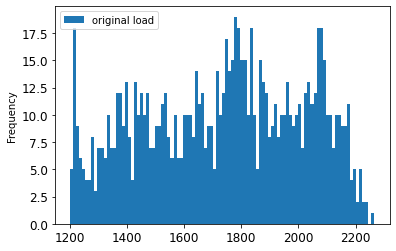

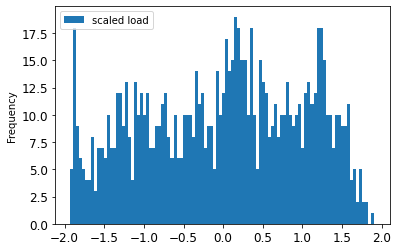

In [21]:
stlf_data[(stlf_data.index >=4801) & (stlf_data.index <=5761)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4801) & (valid.index <=5761)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4801,-0.631561,0.231636,-1.200504,-1.658081,-1.227139,-1.52488,-0.333372,-0.102733,-0.052074,-0.625935,-0.621265,-0.843758,-0.192961,-0.732413
4802,-0.732413,0.168612,-1.110197,-1.658081,-1.227139,-1.52488,-0.257744,0.001657,0.160300,-0.665541,-0.697058,-0.905355,-0.271178,-0.775635
4803,-0.775635,0.105588,-1.019890,-1.658081,-1.227139,-1.52488,-0.354980,-0.005542,0.160300,-0.665541,-0.762024,-0.948836,-0.353179,-0.833265
4804,-0.833265,0.042564,-0.929583,-1.513750,-1.227139,-1.52488,-0.524241,-0.318712,0.001920,-0.759154,-0.873910,-1.086524,-0.426350,-0.970136
4805,-0.970136,-0.020460,-0.839276,-1.513750,-1.227139,-1.52488,-0.632280,-0.333111,-0.102467,-0.849166,-0.967749,-1.140875,-0.502358,-0.977340
4806,-0.977340,-0.083485,-0.748969,-1.513750,-1.227139,-1.52488,-0.733117,-0.257518,0.001920,-0.942779,-1.000232,-1.195225,-0.588145,-0.980941
4807,-0.980941,-0.146509,-0.658662,-1.513750,-1.227139,-1.52488,-0.776332,-0.354709,-0.005279,-1.011189,-1.054370,-1.166238,-0.673615,-1.088997
4808,-1.088997,-0.209533,-0.568355,-1.369419,-1.227139,-1.52488,-0.833953,-0.523893,-0.318441,-1.090400,-1.079635,-1.220589,-0.741109,-1.143025
4809,-1.143025,-0.272557,-0.478048,-1.369419,-1.227139,-1.52488,-0.970803,-0.631883,-0.332839,-1.126405,-1.137382,-1.274940,-0.812071,-1.179044
4810,-1.179044,-0.335582,-0.387741,-1.369419,-1.227139,-1.52488,-0.978005,-0.732673,-0.257248,-1.256023,-1.205957,-1.274940,-0.892811,-1.243877


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4801,-0.631561,0.231636,-1.200504,-1.658081,-1.227139,-1.52488,-0.333372,-0.102733,-0.052074,-0.625935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.631561
4802,-0.732413,0.168612,-1.110197,-1.658081,-1.227139,-1.52488,-0.257744,0.001657,0.160300,-0.665541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.631561,-0.732413
4803,-0.775635,0.105588,-1.019890,-1.658081,-1.227139,-1.52488,-0.354980,-0.005542,0.160300,-0.665541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.631561,-0.732413,-0.775635
4804,-0.833265,0.042564,-0.929583,-1.513750,-1.227139,-1.52488,-0.524241,-0.318712,0.001920,-0.759154,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.631561,-0.732413,-0.775635,-0.833265
4805,-0.970136,-0.020460,-0.839276,-1.513750,-1.227139,-1.52488,-0.632280,-0.333111,-0.102467,-0.849166,...,NaN,NaN,NaN,NaN,NaN,-0.631561,-0.732413,-0.775635,-0.833265,-0.970136
4806,-0.977340,-0.083485,-0.748969,-1.513750,-1.227139,-1.52488,-0.733117,-0.257518,0.001920,-0.942779,...,NaN,NaN,NaN,NaN,-0.631561,-0.732413,-0.775635,-0.833265,-0.970136,-0.977340
4807,-0.980941,-0.146509,-0.658662,-1.513750,-1.227139,-1.52488,-0.776332,-0.354709,-0.005279,-1.011189,...,NaN,NaN,NaN,-0.631561,-0.732413,-0.775635,-0.833265,-0.970136,-0.977340,-0.980941
4808,-1.088997,-0.209533,-0.568355,-1.369419,-1.227139,-1.52488,-0.833953,-0.523893,-0.318441,-1.090400,...,NaN,NaN,-0.631561,-0.732413,-0.775635,-0.833265,-0.970136,-0.977340,-0.980941,-1.088997
4809,-1.143025,-0.272557,-0.478048,-1.369419,-1.227139,-1.52488,-0.970803,-0.631883,-0.332839,-1.126405,...,NaN,-0.631561,-0.732413,-0.775635,-0.833265,-0.970136,-0.977340,-0.980941,-1.088997,-1.143025
4810,-1.179044,-0.335582,-0.387741,-1.369419,-1.227139,-1.52488,-0.978005,-0.732673,-0.257248,-1.256023,...,-0.631561,-0.732413,-0.775635,-0.833265,-0.970136,-0.977340,-0.980941,-1.088997,-1.143025,-1.179044


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4811,-1.243877,-0.398606,-0.297434,-1.369419,-1.227139,-1.52488,-0.981607,-0.775869,-0.354436,-1.212817,...,-0.732413,-0.775635,-0.833265,-0.970136,-0.977340,-0.980941,-1.088997,-1.143025,-1.179044,-1.243877
4812,-1.362739,-0.461630,-0.207127,-1.225087,-1.227139,-1.52488,-1.089646,-0.833463,-0.523615,-1.216418,...,-0.775635,-0.833265,-0.970136,-0.977340,-0.980941,-1.088997,-1.143025,-1.179044,-1.243877,-1.362739
4813,-1.333924,-0.512049,-0.173261,-1.225087,-1.227139,-1.52488,-1.143665,-0.970250,-0.631602,-1.295629,...,-0.833265,-0.970136,-0.977340,-0.980941,-1.088997,-1.143025,-1.179044,-1.243877,-1.362739,-1.333924
4814,-1.351933,-0.562469,-0.139396,-1.225087,-1.227139,-1.52488,-1.179678,-0.977450,-0.732390,-1.331634,...,-0.970136,-0.977340,-0.980941,-1.088997,-1.143025,-1.179044,-1.243877,-1.362739,-1.333924,-1.351933
4815,-1.359137,-0.612888,-0.105531,-1.225087,-1.227139,-1.52488,-1.244502,-0.981049,-0.775584,-1.313631,...,-0.977340,-0.980941,-1.088997,-1.143025,-1.179044,-1.243877,-1.362739,-1.333924,-1.351933,-1.359137


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4811,-1.362739
4812,-1.333924
4813,-1.351933
4814,-1.359137
4815,-1.377146
...,...
5756,-0.289384
5757,-0.332606
5758,-0.429857
5759,-0.174124


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
4811,-1.243877,-1.243877,-1.179044,-1.143025,-1.088997,-0.980941,-0.977340,-0.970136,-0.833265,-0.775635,...,-1.369419,-1.227139,-1.524880,-0.981607,-0.775869,-0.354436,-1.212817,-1.180692,-1.303927,-0.970712
4812,-1.362739,-1.362739,-1.243877,-1.179044,-1.143025,-1.088997,-0.980941,-0.977340,-0.970136,-0.833265,...,-1.225087,-1.227139,-1.524880,-1.089646,-0.833463,-0.523615,-1.216418,-1.195129,-1.347407,-1.044198
4813,-1.333924,-1.333924,-1.362739,-1.243877,-1.179044,-1.143025,-1.088997,-0.980941,-0.977340,-0.970136,...,-1.225087,-1.227139,-1.524880,-1.143665,-0.970250,-0.631602,-1.295629,-1.278141,-1.452485,-1.105699
4814,-1.351933,-1.351933,-1.333924,-1.362739,-1.243877,-1.179044,-1.143025,-1.088997,-0.980941,-0.977340,...,-1.225087,-1.227139,-1.524880,-1.179678,-0.977450,-0.732390,-1.331634,-1.307015,-1.434368,-1.159946
4815,-1.359137,-1.359137,-1.351933,-1.333924,-1.362739,-1.243877,-1.179044,-1.143025,-1.088997,-0.980941,...,-1.225087,-1.227139,-1.524880,-1.244502,-0.981049,-0.775584,-1.313631,-1.296187,-1.358277,-1.211039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,-0.130902,-0.130902,0.038386,0.139238,0.153645,0.175256,0.276108,0.276108,0.059997,0.016774,...,1.661535,-0.205232,0.655789,0.174412,0.016056,0.498658,-0.383501,-0.798116,-0.343732,0.157122
5757,-0.289384,-0.289384,-0.130902,0.038386,0.139238,0.153645,0.175256,0.276108,0.276108,0.059997,...,1.661535,-0.205232,0.655789,0.152804,0.059252,0.448264,-0.411705,-0.863082,-0.499537,0.092467
5758,-0.332606,-0.332606,-0.289384,-0.130902,0.038386,0.139238,0.153645,0.175256,0.276108,0.276108,...,1.661535,-0.205232,0.655789,0.138399,0.275232,0.185497,-0.439909,-0.953312,-0.582875,0.047051
5759,-0.429857,-0.429857,-0.332606,-0.289384,-0.130902,0.038386,0.139238,0.153645,0.175256,0.276108,...,1.661535,-0.205232,0.655789,0.037563,0.275232,0.160300,-0.468113,-1.011060,-0.669836,-0.004673


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(950, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(950,24,1)
print(X_valid.shape)

(950, 24, 1)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(Conv1D(filters=128, kernel_size=1, padding='causal',activation='relu', dilation_rate=1,input_shape=(24,1)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
model.add(Conv1D(filters=128, kernel_size=2, padding='causal',activation='relu', dilation_rate=2))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(Conv1D(filters=512, kernel_size=1, activation='relu')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add(Bidirectional(LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 128)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 128)           32896     
_________________________________________________________________
time_distributed (TimeDistri (None, 24, 128)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 296,577
Trainable params: 296,577
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
16/16 [==============================] - 7s 459ms/step - loss: 1.9670 - val_loss: 0.1607
Epoch 2/300
16/16 [==============================] - 6s 398ms/step - loss: 0.1112 - val_loss: 0.0442
Epoch 3/300
16/16 [==============================] - 6s 395ms/step - loss: 0.0493 - val_loss: 0.0229
Epoch 4/300
16/16 [==============================] - 6s 395ms/step - loss: 0.0384 - val_loss: 0.0209
Epoch 5/300
16/16 [==============================] - 6s 388ms/step - loss: 0.0360 - val_loss: 0.0206
Epoch 6/300
16/16 [==============================] - 6s 389ms/step - loss: 0.0349 - val_loss: 0.0197
Epoch 7/300
16/16 [==============================] - 6s 389ms/step - loss: 0.0344 - val_loss: 0.0193
Epoch 8/300
16/16 [==============================] - 6s 387ms/step - loss: 0.0341 - val_loss: 0.0198
Epoch 9/300
16/16 [==============================] - 6s 386ms/step - loss: 0.0339 - val_loss: 0.0193
Epoch 10/300
16/16 [==============================] - 6s 388ms/step - loss: 0.0337 - val_lo

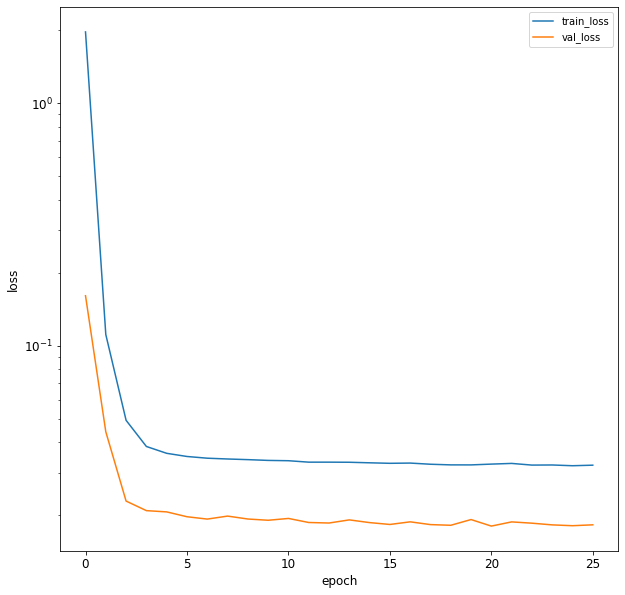

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5762][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5762,1636.0,6.562451,94.353337,1.0,3.0,0.0,1746.0,1855.0,1982.0,1510.0,1676.0,1659.0,1804.000000
5763,1613.0,6.022451,96.286280,1.0,3.0,0.0,1720.0,1849.0,1966.0,1492.0,1638.0,1616.0,1774.583333
5764,1601.0,6.022451,96.286280,2.0,3.0,0.0,1688.0,1851.0,1942.0,1469.0,1619.0,1607.0,1746.166667
5765,1569.0,6.022451,96.286280,2.0,3.0,0.0,1663.0,1797.0,1935.0,1422.0,1609.0,1600.0,1715.666667
5766,1577.0,5.842451,96.144815,2.0,3.0,0.0,1636.0,1746.0,1855.0,1465.0,1607.0,1558.0,1692.500000
5767,1570.0,5.662451,96.003350,2.0,3.0,0.0,1613.0,1720.0,1849.0,1445.0,1622.0,1576.0,1669.250000
5768,1562.0,5.662451,96.003350,3.0,3.0,0.0,1601.0,1688.0,1851.0,1432.0,1594.0,1568.0,1645.166667
5769,1549.0,5.662451,96.003350,3.0,3.0,0.0,1569.0,1663.0,1797.0,1431.0,1570.0,1554.0,1624.500000
5770,1528.0,5.467451,96.230240,3.0,3.0,0.0,1577.0,1636.0,1746.0,1406.0,1563.0,1518.0,1606.333333
5771,1519.0,5.272451,96.457130,3.0,3.0,0.0,1570.0,1613.0,1720.0,1388.0,1546.0,1505.0,1589.583333


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2878 entries, 5762 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2878 non-null   float64
 1   Temp    2878 non-null   float64
 2   Hum     2878 non-null   float64
 3   A       2878 non-null   float64
 4   B       2878 non-null   float64
 5   C       2878 non-null   float64
 6   D       2878 non-null   float64
 7   E       2878 non-null   float64
 8   F       2878 non-null   float64
 9   G       2878 non-null   float64
 10  H       2878 non-null   float64
 11  I       2878 non-null   float64
 12  J       2878 non-null   float64
dtypes: float64(13)
memory usage: 314.8 KB


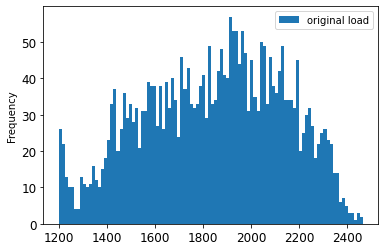

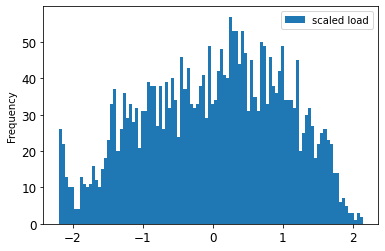

In [36]:
stlf_data[stlf_data.index >= 5762][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5762][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5762,-0.704350,-1.320854,1.080350,-1.663498,-0.498368,-1.415689,-0.326414,0.048071,0.484242,-1.133429,-0.555359,-0.624190,-0.132824,-0.783351
5763,-0.783351,-1.456662,1.185374,-1.663498,-0.498368,-1.415689,-0.415715,0.027463,0.429287,-1.195335,-0.686927,-0.773581,-0.238341,-0.824569
5764,-0.824569,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.525625,0.034332,0.346855,-1.274437,-0.752711,-0.804849,-0.340272,-0.934483
5765,-0.934483,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.611492,-0.151143,0.322812,-1.436079,-0.787335,-0.829168,-0.449675,-0.907004
5766,-0.907004,-1.501932,1.177688,-1.518946,-0.498368,-1.415689,-0.704229,-0.326314,0.048037,-1.288194,-0.794259,-0.975085,-0.532773,-0.931048
5767,-0.931048,-1.547201,1.170002,-1.518946,-0.498368,-1.415689,-0.783226,-0.415617,0.027429,-1.356978,-0.742324,-0.912549,-0.616171,-0.958527
5768,-0.958527,-1.547201,1.170002,-1.374395,-0.498368,-1.415689,-0.824442,-0.525529,0.034299,-1.401687,-0.839270,-0.940343,-0.702557,-1.003179
5769,-1.003179,-1.547201,1.170002,-1.374395,-0.498368,-1.415689,-0.934352,-0.611397,-0.151175,-1.405127,-0.922365,-0.988982,-0.776688,-1.075310
5770,-1.075310,-1.596243,1.182329,-1.374395,-0.498368,-1.415689,-0.906875,-0.704135,-0.326343,-1.491107,-0.946602,-1.114054,-0.841852,-1.106223
5771,-1.106223,-1.645285,1.194657,-1.374395,-0.498368,-1.415689,-0.930918,-0.783133,-0.415645,-1.553012,-1.005461,-1.159219,-0.901934,-1.271094


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5762,-0.704350,-1.320854,1.080350,-1.663498,-0.498368,-1.415689,-0.326414,0.048071,0.484242,-1.133429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.704350
5763,-0.783351,-1.456662,1.185374,-1.663498,-0.498368,-1.415689,-0.415715,0.027463,0.429287,-1.195335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.704350,-0.783351
5764,-0.824569,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.525625,0.034332,0.346855,-1.274437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.704350,-0.783351,-0.824569
5765,-0.934483,-1.456662,1.185374,-1.518946,-0.498368,-1.415689,-0.611492,-0.151143,0.322812,-1.436079,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.704350,-0.783351,-0.824569,-0.934483
5766,-0.907004,-1.501932,1.177688,-1.518946,-0.498368,-1.415689,-0.704229,-0.326314,0.048037,-1.288194,...,NaN,NaN,NaN,NaN,NaN,-0.704350,-0.783351,-0.824569,-0.934483,-0.907004
5767,-0.931048,-1.547201,1.170002,-1.518946,-0.498368,-1.415689,-0.783226,-0.415617,0.027429,-1.356978,...,NaN,NaN,NaN,NaN,-0.704350,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048
5768,-0.958527,-1.547201,1.170002,-1.374395,-0.498368,-1.415689,-0.824442,-0.525529,0.034299,-1.401687,...,NaN,NaN,NaN,-0.704350,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527
5769,-1.003179,-1.547201,1.170002,-1.374395,-0.498368,-1.415689,-0.934352,-0.611397,-0.151175,-1.405127,...,NaN,NaN,-0.704350,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179
5770,-1.075310,-1.596243,1.182329,-1.374395,-0.498368,-1.415689,-0.906875,-0.704135,-0.326343,-1.491107,...,NaN,-0.704350,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310
5771,-1.106223,-1.645285,1.194657,-1.374395,-0.498368,-1.415689,-0.930918,-0.783133,-0.415645,-1.553012,...,-0.70435,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5772,-1.271094,-1.645285,1.194657,-1.229843,-0.498368,-1.415689,-0.958395,-0.824350,-0.525555,-1.573648,...,-0.783351,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223,-1.271094
5773,-1.219572,-1.645285,1.194657,-1.229843,-0.498368,-1.415689,-1.003046,-0.934261,-0.611422,-1.618357,...,-0.824569,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223,-1.271094,-1.219572
5774,-1.233311,-1.657860,1.229582,-1.229843,-0.498368,-1.415689,-1.075174,-0.906784,-0.704159,-1.614918,...,-0.934483,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223,-1.271094,-1.219572,-1.233311
5775,-1.257355,-1.670435,1.264506,-1.229843,-0.498368,-1.415689,-1.106086,-0.930827,-0.783157,-1.522060,...,-0.907004,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223,-1.271094,-1.219572,-1.233311,-1.257355
5776,-1.229877,-1.670435,1.264506,-1.085292,-0.498368,-1.415689,-1.270951,-0.958305,-0.824373,-1.511742,...,-0.931048,-0.958527,-1.003179,-1.075310,-1.106223,-1.271094,-1.219572,-1.233311,-1.257355,-1.229877


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5772,-1.219572
5773,-1.233311
5774,-1.257355
5775,-1.229877
5776,-1.260790
...,...
8634,-0.185694
8635,-0.230347
8636,-0.323086
8637,-0.481088


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5772,-1.271094,-1.271094,-1.106223,-1.075310,-1.003179,-0.958527,-0.931048,-0.907004,-0.934483,-0.824569,...,-1.229843,-0.498368,-1.415689,-0.958395,-0.824350,-0.525555,-1.573648,-1.036622,-1.162693,-0.966798
5773,-1.219572,-1.219572,-1.271094,-1.106223,-1.075310,-1.003179,-0.958527,-0.931048,-0.907004,-0.934483,...,-1.229843,-0.498368,-1.415689,-1.003046,-0.934261,-0.611422,-1.618357,-1.182040,-1.121002,-1.019706
5774,-1.233311,-1.233311,-1.219572,-1.271094,-1.106223,-1.075310,-1.003179,-0.958527,-0.931048,-0.907004,...,-1.229843,-0.498368,-1.415689,-1.075174,-0.906784,-0.704159,-1.614918,-1.060859,-1.145322,-1.065739
5775,-1.257355,-1.257355,-1.233311,-1.219572,-1.271094,-1.106223,-1.075310,-1.003179,-0.958527,-0.931048,...,-1.229843,-0.498368,-1.415689,-1.106086,-0.930827,-0.783157,-1.522060,-1.047009,-1.121002,-1.106990
5776,-1.229877,-1.229877,-1.257355,-1.233311,-1.219572,-1.271094,-1.106223,-1.075310,-1.003179,-0.958527,...,-1.085292,-0.498368,-1.415689,-1.270951,-0.958305,-0.824373,-1.511742,-1.071246,-1.138373,-1.142262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8634,0.102830,0.102830,0.123439,0.216179,0.288310,0.466920,0.363876,0.367311,0.394789,0.490964,...,1.516636,0.016827,0.706370,0.466998,0.491151,0.892970,0.056536,0.133644,-0.599870,0.427642
8635,-0.185694,-0.185694,0.102830,0.123439,0.216179,0.288310,0.466920,0.363876,0.367311,0.394789,...,1.516636,0.016827,0.706370,0.288395,0.394979,0.793364,-0.026005,0.043624,-0.759684,0.342451
8636,-0.230347,-0.230347,-0.185694,0.102830,0.123439,0.216179,0.288310,0.466920,0.363876,0.367311,...,1.661188,0.016827,0.706370,0.216266,0.367501,0.704062,-0.160134,-0.067171,-0.874333,0.261146
8637,-0.323086,-0.323086,-0.230347,-0.185694,0.102830,0.123439,0.216179,0.288310,0.466920,0.363876,...,1.661188,0.016827,0.706370,0.123530,0.364066,0.601022,-0.376804,-0.226438,-0.961188,0.180738


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2867, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2867, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2867,24,1)

In [45]:
predictions = model.predict(X_test)
predictions

array([[-1.270521  ],
       [-1.2113934 ],
       [-1.2113323 ],
       ...,
       [-0.2847194 ],
       [-0.36603087],
       [-0.5265677 ]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 6762][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1848.040469
dtype: float64
Cons    285.221892
dtype: float64


In [47]:
load_mean=1848.040469
load_std=285.221892
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5772,1500.191795
5773,1496.273062
5774,1489.415278
5775,1497.252745
5776,1488.435595
...,...
8634,1795.076468
8635,1782.340585
8636,1755.889136
8637,1710.823704


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1485.6602],
       [1502.5247],
       [1502.542 ],
       ...,
       [1766.8323],
       [1743.6405],
       [1697.8519]], dtype=float32)

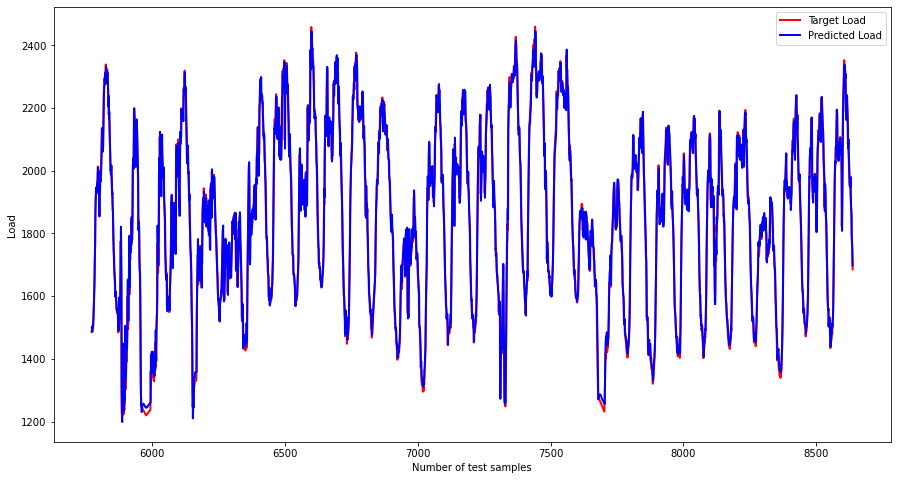

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.51760766077188


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.231162
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5772  149920.148122
5773  149526.888339
5774  148840.646506
5775  149625.241921
5776  148742.243672
...             ...
8634  179404.055743
8635  178134.155326
8636  175488.290393
8637  170980.452248
8638  168434.452169

[2867 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5772   211.168516
5773    39.082461
5774   172.310615
5775     0.237646
5776   383.587932
...           ...
8634  4155.426063
8635     2.976415
8636   119.752296
8637  1076.942269
8638   156.249754

[2867 rows x 1 columns]
y_t+1    1486.456616
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    38.554593
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2867):
    b=a[i]
    print(b)

[1485.6602]
[1502.5247]
[1502.542]
[1497.7402]
[1508.021]
[1499.8818]
[1518.5723]
[1545.3625]
[1563.2383]
[1591.7979]
[1632.9113]
[1664.9824]
[1735.4641]
[1766.9097]
[1874.8425]
[1911.4415]
[1946.5148]
[1932.5449]
[1944.4116]
[1929.3364]
[1931.095]
[1958.193]
[1946.8027]
[1990.6223]
[2009.9944]
[1985.7648]
[1987.0123]
[1998.0215]
[1913.7738]
[1854.2434]
[1949.8505]
[1928.1377]
[1973.6687]
[1965.4147]
[1975.0635]
[1986.7435]
[2011.167]
[2046.8198]
[2099.2876]
[2136.2212]
[2124.422]
[2060.432]
[2080.3074]
[2074.809]
[2123.7034]
[2195.989]
[2243.4233]
[2266.8342]
[2270.763]
[2288.9795]
[2276.583]
[2310.1404]
[2276.9553]
[2315.7686]
[2332.0288]
[2300.349]
[2294.8108]
[2281.5876]
[2302.918]
[2313.879]
[2305.1868]
[2271.0945]
[2259.1833]
[2204.0903]
[2234.2104]
[2167.4238]
[2188.1348]
[2150.3062]
[2113.1604]
[2089.1025]
[2042.5884]
[2001.4838]
[1988.1984]
[2003.9087]
[2016.0901]
[1986.976]
[1963.0264]
[1926.0416]
[1929.6871]
[1874.6447]
[1869.5006]
[1810.4512]
[1775.3606]
[1742.9662]
[1730.5

[2036.3372]
[2109.8342]
[2140.5312]
[2110.7568]
[2034.6953]
[2039.129]
[2085.3604]
[2127.9976]
[2230.0933]
[2239.307]
[2285.6655]
[2309.3245]
[2270.4177]
[2278.6614]
[2317.8577]
[2317.9453]
[2285.8867]
[2346.162]
[2206.1025]
[2070.9329]
[2240.9053]
[2277.9097]
[2321.2124]
[2307.9797]
[2322.5667]
[2311.5862]
[2333.055]
[2303.223]
[2245.479]
[2271.1216]
[2255.9229]
[2211.651]
[2175.5808]
[2147.6152]
[2070.7595]
[2045.0553]
[2084.5854]
[2117.3694]
[2077.4307]
[2048.0957]
[2006.5623]
[1994.1696]
[1978.3945]
[1936.7145]
[1869.1156]
[1819.6244]
[1799.0935]
[1768.4213]
[1730.2229]
[1728.509]
[1730.804]
[1676.6094]
[1666.2454]
[1669.9012]
[1663.605]
[1650.8394]
[1639.8815]
[1622.7117]
[1568.9761]
[1568.3094]
[1589.9531]
[1593.128]
[1603.0493]
[1594.9369]
[1601.2561]
[1602.6754]
[1641.7747]
[1665.1609]
[1675.2926]
[1704.3875]
[1733.9392]
[1834.6189]
[1924.58]
[2003.6532]
[2037.1614]
[2071.4863]
[2037.6282]
[1949.6373]
[1872.1873]
[1885.1177]
[1919.111]
[2020.1064]
[2011.9957]
[1976.4155]
[1971.

[1643.9248]
[1617.1544]
[1586.1143]
[1588.0852]
[1559.2534]
[1529.1492]
[1533.7786]
[1538.312]
[1540.4236]
[1516.6615]
[1501.1221]
[1501.2775]
[1454.8789]
[1494.1106]
[1493.7926]
[1501.9943]
[1500.0505]
[1511.6973]
[1529.8748]
[1548.3926]
[1533.573]
[1582.2285]
[1609.5507]
[1694.1792]
[1792.0657]
[1858.2208]
[1944.0499]
[2012.612]
[2044.8591]
[2074.8906]
[2078.5562]
[2045.5398]
[2047.0597]
[2060.9119]
[2150.1848]
[2161.3164]
[2178.1467]
[2022.6443]
[1904.0156]
[1935.9098]
[1965.5132]
[2014.6263]
[2060.8184]
[2048.591]
[2020.7554]
[1996.3379]
[2031.24]
[2046.8303]
[2040.4537]
[2039.3788]
[2032.5735]
[2031.9318]
[1958.8851]
[1913.7041]
[1952.3965]
[1970.6631]
[2043.306]
[2121.4055]
[2140.4045]
[2157.2559]
[2189.2156]
[2209.4465]
[2197.3315]
[2247.1316]
[2255.4824]
[2224.0117]
[2265.128]
[2242.584]
[2208.5288]
[2201.1855]
[2194.4175]
[2240.7173]
[2274.4663]
[2248.5505]
[2236.1904]
[2188.4326]
[2160.705]
[2137.4167]
[2144.6174]
[2120.9685]
[2060.075]
[2041.7897]
[1996.9126]
[1957.7811]
[19

[2057.5583]
[2068.1743]
[2092.79]
[2130.9097]
[2110.7944]
[2132.4395]
[2101.317]
[2073.468]
[2033.7643]
[2018.7491]
[2121.5984]
[2144.1099]
[2139.6204]
[2125.7795]
[2115.228]
[2115.924]
[2073.168]
[2071.3413]
[2050.8694]
[2023.4594]
[2000.1781]
[1970.4684]
[1924.6682]
[1878.0997]
[1878.998]
[1934.3005]
[1887.902]
[1863.6655]
[1832.3219]
[1825.2434]
[1793.6847]
[1752.6067]
[1710.6776]
[1651.5237]
[1614.1146]
[1558.5406]
[1549.867]
[1541.8308]
[1524.8533]
[1500.7136]
[1488.998]
[1468.5432]
[1471.5887]
[1450.1451]
[1435.3977]
[1422.5422]
[1436.3057]
[1415.0448]
[1419.3391]
[1429.6368]
[1424.5885]
[1436.917]
[1437.687]
[1457.352]
[1467.5396]
[1416.8481]
[1463.2452]
[1507.0574]
[1599.4103]
[1659.0037]
[1765.6304]
[1829.7466]
[1869.0236]
[1890.6019]
[1914.843]
[1980.3721]
[1957.324]
[1946.5878]
[1960.2544]
[2025.1257]
[2048.647]
[2017.9094]
[1960.2345]
[1911.897]
[1931.8043]
[1892.3877]
[1893.0654]
[1925.3157]
[1935.0653]
[1939.0237]
[1919.8839]
[1876.1189]
[1937.0635]
[1939.7297]
[1927.6414